## I. Web Scrapping

### Import Libraries

In [159]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup as bs
import requests
import string # special operations on strings
import spacy # language models
import nltk
from nltk import tokenize
import re
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet,stopwords
from nltk import ngrams
from textblob import TextBlob, Word, Blobber
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud,STOPWORDS
%matplotlib inline

### 1. Extracting Data for a Beard Trimmer

#### *Product Name - Philips BT1212/15 USB charging cordless rechargeable Beard Trimmer*

In [90]:
link = "https://www.amazon.in/Philips-BT1212-Beard-Trimmer-Green/product-reviews/B0744L38KK/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"

In [91]:
page = requests.get(link)
page.content

b'<!doctype html><html lang="en-in" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->\n<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n\n<!-- sp:feature:cs-optimization -->\n<meta http-equiv=\'x-dns-prefetch-control\' content=\'on\'>\n<link rel="dns-prefetch" href="https://images-eu.ssl-images-amazon.com">\n<link rel="dns-prefetch" href="https://m.media-amazon.com">\n<link rel="dns-prefetch" href="https://completion.amazon.com">\n\n<!-- sp:feature:aui-assets -->\n<link rel="stylesheet" href="https://images-eu.ssl-images-amazon.com/images/I/11EIQ5IGqaL._RC|012LjolmrML.css,41+dLWMMeXL.css,21qPwhPKAAL.css,01Vctty9pOL.css,017DsKjNQJL.css,0131vqwP5UL.css,41EWOOlBJ9L.css,11TIuySqr6L.css,01ElnPiDxWL.css,11bGSgD5pDL.css,01Dm5eKVxwL.css,01IdKcBuAdL.css,01y-XAlI+2L.css,01ZfXnjPmmL.css,01oDR3IULNL.css,31q1y1irc5L.css,01XPHJk60-L.css,01R0k0yxPXL.css,21xVR0NtxzL.css,11gneA3MtJL.css,21fecG8pUzL.css,01RddH8vm-L.css,01CFUgsA-YL.css,21AmhU6t0s

In [92]:
soup = bs(page.content,'html.parser')
len(soup)

7

In [93]:
print(soup.prettify())

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in">
 <!-- sp:feature:head-start -->
 <head>
  <script>
   var aPageStart = (new Date()).getTime();
  </script>
  <meta charset="utf-8"/>
  <!-- sp:feature:cs-optimization -->
  <meta content="on" http-equiv="x-dns-prefetch-control"/>
  <link href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
  <link href="https://m.media-amazon.com" rel="dns-prefetch"/>
  <link href="https://completion.amazon.com" rel="dns-prefetch"/>
  <!-- sp:feature:aui-assets -->
  <link href="https://images-eu.ssl-images-amazon.com/images/I/11EIQ5IGqaL._RC|012LjolmrML.css,41+dLWMMeXL.css,21qPwhPKAAL.css,01Vctty9pOL.css,017DsKjNQJL.css,0131vqwP5UL.css,41EWOOlBJ9L.css,11TIuySqr6L.css,01ElnPiDxWL.css,11bGSgD5pDL.css,01Dm5eKVxwL.css,01IdKcBuAdL.css,01y-XAlI+2L.css,01ZfXnjPmmL.css,01oDR3IULNL.css,31q1y1irc5L.css,01XPHJk60-L.css,01R0k0yxPXL.css,21xVR0NtxzL.css,11gneA3MtJL.css,21fecG8pUzL.css,01RddH8vm-L.css,01CFUgsA-YL.css,21AmhU6t0s

### 2. Finding Users who posted reviews

In [94]:
names = soup.find_all('span',class_='a-profile-name')
names

[<span class="a-profile-name">Vaibhav Agarwal</span>,
 <span class="a-profile-name">parthasarathy</span>,
 <span class="a-profile-name">Vaibhav Agarwal</span>,
 <span class="a-profile-name">parthasarathy</span>,
 <span class="a-profile-name">Dr.Hasanur Rahman</span>,
 <span class="a-profile-name">SunGazer</span>,
 <span class="a-profile-name">Abhijeet Tambe</span>,
 <span class="a-profile-name">Sunil</span>,
 <span class="a-profile-name">Yusuf Ali</span>,
 <span class="a-profile-name">Prithvi Reddy</span>,
 <span class="a-profile-name">Bhupesh Patel</span>,
 <span class="a-profile-name">PaddleShifter</span>]

### 2.1 Getting User names

In [95]:
cust_name = []
for i in range(0,len(names)):
    cust_name.append(names[i].get_text())
cust_name

['Vaibhav Agarwal',
 'parthasarathy',
 'Vaibhav Agarwal',
 'parthasarathy',
 'Dr.Hasanur Rahman',
 'SunGazer',
 'Abhijeet Tambe',
 'Sunil',
 'Yusuf Ali',
 'Prithvi Reddy',
 'Bhupesh Patel',
 'PaddleShifter']

### 2.2 As the first two names are repeated so we delete them

In [96]:
cust_name.pop(0)
cust_name.pop(0)
cust_name

['Vaibhav Agarwal',
 'parthasarathy',
 'Dr.Hasanur Rahman',
 'SunGazer',
 'Abhijeet Tambe',
 'Sunil',
 'Yusuf Ali',
 'Prithvi Reddy',
 'Bhupesh Patel',
 'PaddleShifter']

### 3. Getting Review Heading

In [97]:
title = soup.find_all('a',class_='review-title-content')
title

[<a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" data-hook="review-title" href="/gp/customer-reviews/RXTBUMRW47SW?ASIN=B0744L38KK">
 <span>All you need to know!</span>
 </a>,
 <a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" data-hook="review-title" href="/gp/customer-reviews/R2YWA3YJY1CZUX?ASIN=B0744L38KK">
 <span>Not working after one use</span>
 </a>,
 <a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" data-hook="review-title" href="/gp/customer-reviews/R2MOXDDE8Y3OPQ?ASIN=B0744L38KK">
 <span>Good</span>
 </a>,
 <a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" data-hook="review-title" href="/gp/customer-reviews/R2NBMCNT4XO4SN?ASIN=B0744L38KK">
 <span>So much simpler to trim with this one.</span>
 </a>,
 <a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" d

### 3.1 Creating list of Review

In [98]:
review_title = []
for i in range(0,len(title)):
    review_title.append(title[i].get_text())
review_title

['\nAll you need to know!\n',
 '\nNot working after one use\n',
 '\nGood\n',
 '\nSo much simpler to trim with this one.\n',
 '\nAwesome\n',
 '\nWorst trimmer I have ever used...\n',
 "\nThis is the worst I bought ever... Don't buy it...\n",
 '\nVERY DANGEROUS! CAUSES BLEEDING!\n',
 '\nEasy to Use\n',
 '\nThe fault in four stars\n']

### 3.2 Getting Review Title

In [99]:
review_title[:] = [titles.lstrip('\n') for titles in review_title]
review_title[:] = [titles.rstrip('\n') for titles in review_title]
review_title

['All you need to know!',
 'Not working after one use',
 'Good',
 'So much simpler to trim with this one.',
 'Awesome',
 'Worst trimmer I have ever used...',
 "This is the worst I bought ever... Don't buy it...",
 'VERY DANGEROUS! CAUSES BLEEDING!',
 'Easy to Use',
 'The fault in four stars']

### 4. Getting Star Rating

In [100]:
rating = soup.find_all('i',class_='review-rating')
rating

[<i class="a-icon a-icon-star a-star-4 review-rating" data-hook="review-star-rating-view-point"><span class="a-icon-alt">4.0 out of 5 stars</span></i>,
 <i class="a-icon a-icon-star a-star-1 review-rating" data-hook="review-star-rating-view-point"><span class="a-icon-alt">1.0 out of 5 stars</span></i>,
 <i class="a-icon a-icon-star a-star-4 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">4.0 out of 5 stars</span></i>,
 <i class="a-icon a-icon-star a-star-1 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">1.0 out of 5 stars</span></i>,
 <i class="a-icon a-icon-star a-star-5 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">5.0 out of 5 stars</span></i>,
 <i class="a-icon a-icon-star a-star-5 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">5.0 out of 5 stars</span></i>,
 <i class="a-icon a-icon-star a-star-5 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">5.0 out of 5 stars</sp

### 4.1 Creating List of Ratings

In [101]:
rate = []
for i in range(0,len(rating)):
    rate.append(rating[i].get_text())
rate

['4.0 out of 5 stars',
 '1.0 out of 5 stars',
 '4.0 out of 5 stars',
 '1.0 out of 5 stars',
 '5.0 out of 5 stars',
 '5.0 out of 5 stars',
 '5.0 out of 5 stars',
 '1.0 out of 5 stars',
 '1.0 out of 5 stars',
 '1.0 out of 5 stars',
 '4.0 out of 5 stars',
 '1.0 out of 5 stars']

### 4.2 Getting ratings

In [102]:
rate.pop(0)
rate.pop(0)
rate

['4.0 out of 5 stars',
 '1.0 out of 5 stars',
 '5.0 out of 5 stars',
 '5.0 out of 5 stars',
 '5.0 out of 5 stars',
 '1.0 out of 5 stars',
 '1.0 out of 5 stars',
 '1.0 out of 5 stars',
 '4.0 out of 5 stars',
 '1.0 out of 5 stars']

### 5. Getting Review Content

In [103]:
review = soup.find_all('span',{'data-hook':'review-body'})
review

[<span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>
   All you need to know before buying this trimmer<br/><br/>Pros:<br/>* Powerful<br/>* Sturdy<br/>* Sharp and Precise<br/>* Ergonomic Shape and Easy to use.<br/>* 5 trims in one charge<br/>* Usb type charging<br/>* Easy to clean<br/><br/>Cons:<br/>* Charger not provided (only cable is provided)<br/>* Charging takes 8 hours.<br/>* Only 3 sizes (1mm, 5mm, 7mm)<br/><br/>In the process of buying this trimmer, I went through a lot of web surfing. Here is what I found.<br/><br/>Brand: No doubt Philips is the best brand for trimmer and shaver as of now.<br/><br/>Why Trimmer, and not Shaver or Hybrid of both?<br/>This was one of the main doubts. Weather one should go for a trimmer, a shaver or a hybrid of both. Electric shavers does feel pretty smooth and leave less cuts on skin, but don’t give shaves as close a a razor. If one wants to trim, you’ll anyways need a trimmer. More over, you’ll have to wait

### 5.1 Creating List of Review Content

In [104]:
review_content = []
for i in range(0,len(review)):
    review_content.append(review[i].get_text())
review_content

['\n\n  All you need to know before buying this trimmerPros:* Powerful* Sturdy* Sharp and Precise* Ergonomic Shape and Easy to use.* 5 trims in one charge* Usb type charging* Easy to cleanCons:* Charger not provided (only cable is provided)* Charging takes 8 hours.* Only 3 sizes (1mm, 5mm, 7mm)In the process of buying this trimmer, I went through a lot of web surfing. Here is what I found.Brand: No doubt Philips is the best brand for trimmer and shaver as of now.Why Trimmer, and not Shaver or Hybrid of both?This was one of the main doubts. Weather one should go for a trimmer, a shaver or a hybrid of both. Electric shavers does feel pretty smooth and leave less cuts on skin, but don’t give shaves as close a a razor. If one wants to trim, you’ll anyways need a trimmer. More over, you’ll have to wait for 8 hours of charging to get shaved which can easily be done by a razor too which I think is a big trade off. Hybrid devices can do both shaving and trimming but then they are very expensiv

### 5.2 Getting Review Content

In [105]:
review_content[:] = [reviews.lstrip('\n') for reviews in review_content]
review_content[:] = [reviews.rstrip('\n') for reviews in review_content]
review_content

['  All you need to know before buying this trimmerPros:* Powerful* Sturdy* Sharp and Precise* Ergonomic Shape and Easy to use.* 5 trims in one charge* Usb type charging* Easy to cleanCons:* Charger not provided (only cable is provided)* Charging takes 8 hours.* Only 3 sizes (1mm, 5mm, 7mm)In the process of buying this trimmer, I went through a lot of web surfing. Here is what I found.Brand: No doubt Philips is the best brand for trimmer and shaver as of now.Why Trimmer, and not Shaver or Hybrid of both?This was one of the main doubts. Weather one should go for a trimmer, a shaver or a hybrid of both. Electric shavers does feel pretty smooth and leave less cuts on skin, but don’t give shaves as close a a razor. If one wants to trim, you’ll anyways need a trimmer. More over, you’ll have to wait for 8 hours of charging to get shaved which can easily be done by a razor too which I think is a big trade off. Hybrid devices can do both shaving and trimming but then they are very expensive wi

### Making DataFrame from the Scrapped

In [199]:
df = pd.DataFrame()

In [200]:
df['Customer_Name'] = cust_name
df['Review_Title'] = review_title
df['Product_Rating'] = rate
df['Product_Review'] = review_content

In [201]:
df

,Customer_Name,Review_Title,Product_Rating,Product_Review
0,Vaibhav Agarwal,All you need to know!,4.0 out of 5 stars,All you need to know before buying this trim...
1,parthasarathy,Not working after one use,1.0 out of 5 stars,"I had use this product only one time , after..."
2,Dr.Hasanur Rahman,Good,5.0 out of 5 stars,"Product is good; but is hasn't charger, only..."
3,SunGazer,So much simpler to trim with this one.,5.0 out of 5 stars,I just use this on the minimum setting every...
4,Abhijeet Tambe,Awesome,5.0 out of 5 stars,If you fed up with your regular trimmer then...
5,Sunil,Worst trimmer I have ever used...,1.0 out of 5 stars,Worst product from such a big brand. Batter...
6,Yusuf Ali,This is the worst I bought ever... Don't buy i...,1.0 out of 5 stars,This is the worst item... Never buy it... I ...
7,Prithvi Reddy,VERY DANGEROUS! CAUSES BLEEDING!,1.0 out of 5 stars,I have been shaving and trimming for 8 years...
8,Bhupesh Patel,Easy to Use,4.0 out of 5 stars,Good and easy to use. but beware when using ...
9,PaddleShifter,The fault in four stars,1.0 out of 5 stars,One of the few products to have got 1 star f...


#### Save CSV file for future reference

In [35]:
df.to_csv(r'E:\ExcelR Assignment\Assignment 11 - Text Mining\AmazonReview_PhilipsTrimmer.csv',index=True)

## II. Emotion Mining

In [109]:
a = df['Product_Review']

In [110]:
def gen_freq(text):
    word_list = []
    for tw_words in text.split():
        word_list.extend(tw_words)
    word_freq = pd.Series(word_list).value_counts()
    word_freq[:20]
    return word_freq

In [111]:
gen_freq(a.str)

to          34
a           30
I           30
is          28
the         28
            ..
Nice         1
trimmed      1
use.4.       1
Electric     1
think        1
Length: 513, dtype: int64

In [112]:
word_freq = gen_freq(a.str)

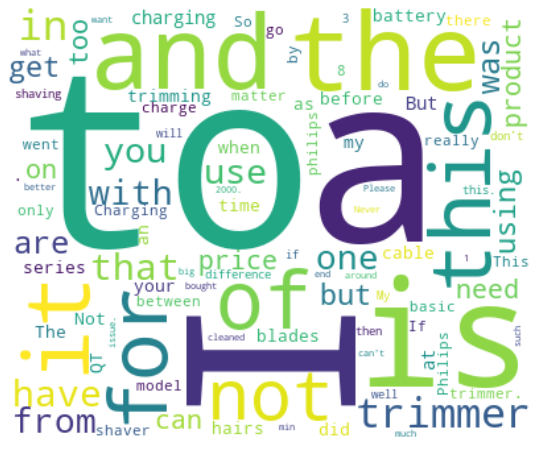

In [113]:
wc = WordCloud(width=400,height=330,max_words=100,background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(12,8))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

#### This wordcloud contains many stopwords, which needs to be resolved

### First we will remove unneccessary character and merge content

In [114]:
a.head()

0      All you need to know before buying this trim...
1      I had use this product only one time , after...
2      Product is good; but is hasn't charger, only...
3      I just use this on the minimum setting every...
4      If you fed up with your regular trimmer then...
Name: Product_Review, dtype: object

#### 1. Removing Punctuation

In [115]:
df['Product_Review'] = df['Product_Review'].str.replace('[^\w\s]','')
df['Product_Review']

0      All you need to know before buying this trim...
1      I had use this product only one time  after ...
2      Product is good but is hasnt charger only da...
3      I just use this on the minimum setting every...
4      If you fed up with your regular trimmer then...
5      Worst product from such a big brand  Battery...
6      This is the worst item Never buy it I want t...
7      I have been shaving and trimming for 8 years...
8      Good and easy to use but beware when using w...
9      One of the few products to have got 1 star f...
Name: Product_Review, dtype: object

In [116]:
freq = pd.Series(' '.join(df['Product_Review']).split()).value_counts()[:10]
freq

to         34
a          30
I          30
is         29
the        28
and        25
it         21
this       20
trimmer    18
for        16
dtype: int64

#### 2. Removing Common High Frequency Words

In [117]:
df['Product_Review'] = df['Product_Review'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['Product_Review']

0    All you need know before buying trimmerPros Po...
1    had use product only one time after that not w...
2    Product good but hasnt charger only data cable...
3    just use on minimum setting everyday dont miss...
4    If you fed up with your regular then you shoul...
5    Worst product from such big brand Battery life...
6    This worst item Never buy want return if cant ...
7    have been shaving trimming 8 years have used m...
8    Good easy use but beware when using whithout c...
9    One of few products have got 1 star from me am...
Name: Product_Review, dtype: object

In [118]:
lfreq = pd.Series(' '.join(df['Product_Review']).split()).value_counts()[-10:]
lfreq

think         1
toothbrush    1
Nice          1
trimmed       1
separately    1
Electric      1
efficient     1
beware        1
while         1
up            1
dtype: int64

#### 3. Removing Common Low Frequency Words

In [119]:
df['Product_Review'] = df['Product_Review'].apply(lambda x: " ".join(x for x in x.split() if x not in lfreq))
df['Product_Review']

0    All you need know before buying trimmerPros Po...
1    had use product only one time after that not w...
2    Product good but hasnt charger only data cable...
3    just use on minimum setting everyday dont miss...
4    If you fed with your regular then you should g...
5    Worst product from such big brand Battery life...
6    This worst item Never buy want return if cant ...
7    have been shaving trimming 8 years have used m...
8    Good easy use but when using whithout caps If ...
9    One of few products have got 1 star from me am...
Name: Product_Review, dtype: object

#### 4. Merge all Reviews

In [120]:
text = ' '.join(df['Product_Review'])
text

'All you need know before buying trimmerPros Powerful Sturdy Sharp Precise Ergonomic Shape Easy use 5 trims in one charge Usb type charging Easy cleanCons Charger not provided only cable provided Charging takes 8 hours Only 3 sizes 1mm 5mm 7mmIn process of buying went through lot of web surfing Here what foundBrand No doubt Philips best brand shaver as of nowWhy Trimmer not Shaver or Hybrid of bothThis was one of main doubts Weather one should go shaver or hybrid of both shavers does feel pretty smooth leave less cuts on skin but dont give shaves as close razor If one wants trim youll anyways need More over youll have wait 8 hours of charging get shaved which can easily be done by razor too which big trade off Hybrid devices can do both shaving trimming but then they are very expensive with price of almost 4k above At price you can buy both shaver A philips price varies from 800 2000 Also besides trimming can do job close shaving Hence going with better optionWhy BT1212This lower end m

#### 4. Tokenize

In [121]:
tokenwords = sent_tokenize(text)
tokenwords

['All you need know before buying trimmerPros Powerful Sturdy Sharp Precise Ergonomic Shape Easy use 5 trims in one charge Usb type charging Easy cleanCons Charger not provided only cable provided Charging takes 8 hours Only 3 sizes 1mm 5mm 7mmIn process of buying went through lot of web surfing Here what foundBrand No doubt Philips best brand shaver as of nowWhy Trimmer not Shaver or Hybrid of bothThis was one of main doubts Weather one should go shaver or hybrid of both shavers does feel pretty smooth leave less cuts on skin but dont give shaves as close razor If one wants trim youll anyways need More over youll have wait 8 hours of charging get shaved which can easily be done by razor too which big trade off Hybrid devices can do both shaving trimming but then they are very expensive with price of almost 4k above At price you can buy both shaver A philips price varies from 800 2000 Also besides trimming can do job close shaving Hence going with better optionWhy BT1212This lower end 

In [122]:
text = text.lower()
text

'all you need know before buying trimmerpros powerful sturdy sharp precise ergonomic shape easy use 5 trims in one charge usb type charging easy cleancons charger not provided only cable provided charging takes 8 hours only 3 sizes 1mm 5mm 7mmin process of buying went through lot of web surfing here what foundbrand no doubt philips best brand shaver as of nowwhy trimmer not shaver or hybrid of boththis was one of main doubts weather one should go shaver or hybrid of both shavers does feel pretty smooth leave less cuts on skin but dont give shaves as close razor if one wants trim youll anyways need more over youll have wait 8 hours of charging get shaved which can easily be done by razor too which big trade off hybrid devices can do both shaving trimming but then they are very expensive with price of almost 4k above at price you can buy both shaver a philips price varies from 800 2000 also besides trimming can do job close shaving hence going with better optionwhy bt1212this lower end m

In [123]:
no_punc_text = text.translate(str.maketrans('', '', string.punctuation))
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

['all', 'you', 'need', 'know', 'before', 'buying', 'trimmerpros', 'powerful', 'sturdy', 'sharp', 'precise', 'ergonomic', 'shape', 'easy', 'use', '5', 'trims', 'in', 'one', 'charge', 'usb', 'type', 'charging', 'easy', 'cleancons', 'charger', 'not', 'provided', 'only', 'cable', 'provided', 'charging', 'takes', '8', 'hours', 'only', '3', 'sizes', '1mm', '5mm', '7mmin', 'process', 'of', 'buying', 'went', 'through', 'lot', 'of', 'web', 'surfing']


#### 5. Stop Words

In [128]:
my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:10])

['need', 'know', 'buying', 'trimmerpros', 'powerful', 'sturdy', 'sharp', 'precise', 'ergonomic', 'shape']


In [126]:
nlp = spacy.load('en_core_web_sm') 

In [127]:
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

need know buying trimmerpros powerful sturdy sharp precise ergonomic shape easy use 5 trims one charge usb type charging easy cleancons charger provided cable provided charging takes 8 hours 3 sizes 1mm 5mm 7mmin process buying went lot


#### 6. Lemmatization

In [88]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['need', 'know', 'buy', 'trimmerpro', 'powerful', 'sturdy', 'sharp', 'precise', 'ergonomic', 'shape', 'easy', 'use', '5', 'trim', 'one', 'charge', 'usb', 'type', 'charge', 'easy', 'cleancon', 'charger', 'provide', 'cable', 'provide']


#### 7. Feature Extraction

In [130]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [136]:
print(vectorizer.vocabulary_)

{'need': 159, 'know': 125, 'buy': 45, 'trimmerpro': 254, 'powerful': 186, 'sturdy': 234, 'sharp': 218, 'precise': 187, 'ergonomic': 89, 'shape': 217, 'easy': 85, 'use': 263, 'trim': 252, 'one': 169, 'charge': 54, 'usb': 262, 'type': 257, 'cleancon': 58, 'charger': 55, 'provide': 194, 'cable': 48, 'take': 241, 'hour': 113, 'size': 226, 'mm': 152, '7mmin': 11, 'process': 191, 'buying': 46, 'go': 102, 'lot': 139, 'web': 273, 'surfing': 238, 'foundbrand': 99, 'doubt': 82, 'philip': 178, 'good': 104, 'brand': 38, 'shaver': 221, 'nowwhy': 164, 'trimmer': 253, 'hybrid': 115, 'boththis': 36, 'main': 142, 'weather': 272, 'feel': 97, 'pretty': 189, 'smooth': 228, 'leave': 129, 'less': 130, 'cut': 68, 'skin': 227, 'do': 81, 'nt': 165, 'give': 101, 'shave': 220, 'close': 60, 'razor': 198, 'want': 268, 'you': 284, 'll': 135, 'anyways': 22, 'wait': 267, 'get': 100, 'easily': 84, 'big': 33, 'trade': 251, 'device': 78, 'expensive': 93, 'price': 190, 'almost': 18, '4k': 6, 'vary': 266, '800': 12, '2000

In [139]:
print(vectorizer.get_feature_names())
print(X.toarray())

['2000', '30min', '35', '37mins', '40', '45min10hr', '4k', '57', '60min', '60min10hr', '60min60', '7mmin', '800', 'accessory', 'addition', 'advance', 'advance2', 'all2', 'almost', 'also', 'amazon', 'among', 'anyways', 'around', 'attach', 'backup', 'bad', 'basic', 'basis', 'battery', 'beard', 'belowpros1', 'besides', 'big', 'blade', 'bleed', 'boththis', 'box', 'brand', 'brush', 'bt', 'bt1212', 'bt1212this', 'button', 'button5', 'buy', 'buying', 'ca', 'cable', 'cableusb', 'cap', 'catch', 'cello', 'centre4', 'charge', 'charger', 'charging', 'clean', 'cleancon', 'clime', 'close', 'coated', 'colour5', 'company', 'con', 'criss', 'cross', 'cumbersome', 'cut', 'cutter', 'daily', 'dangerous', 'datum', 'day', 'decent', 'decide', 'delivery', 'designneutral', 'device', 'difference', 'discharge', 'do', 'doubt', 'duration', 'easily', 'easy', 'end', 'enough', 'ensure', 'ergonomic', 'even', 'everyday', 'expect', 'expensive', 'experience', 'fast', 'feed', 'feel', 'find', 'foundbrand', 'get', 'give', 'g

In [140]:
print(X.toarray().shape)

(563, 285)


#### 8. Bi-Gram and Tri-Gram Analysis

In [143]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(df['Product_Review'])

In [144]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['an', 'are', 'as', 'at', 'attached', 'backup', 'basic', 'battery', 'battery backup', 'be', 'beard', 'because', 'been', 'before', 'between', 'blades', 'both', 'brand', 'but', 'but when', 'by', 'cable', 'can', 'charge', 'charger', 'charging', 'cleaned', 'close', 'did', 'did not', 'difference', 'doesnt', 'dont', 'easy', 'from', 'get', 'given', 'go', 'good', 'hairs', 'have', 'hours', 'hybrid', 'if', 'if you', 'in', 'issue', 'its', 'know', 'larger', 'less', 'long', 'matter', 'min', 'model', 'my', 'need', 'not', 'not an', 'of', 'on', 'one', 'one of', 'only', 'philips', 'price', 'product', 'qt', 'qt series', 'really', 'really dont', 'series', 'shaver', 'shaving', 'skin', 'smooth', 'so', 'that', 'the', 'then', 'there', 'this', 'time', 'too', 'trim', 'trimmers', 'trimming', 'use', 'using', 'very', 'want', 'was', 'we', 'well', 'went', 'when', 'will', 'with', 'you', 'your']
[[ 0  1  2  1  0  2  0  2  2  1  0  0  0  2  2  4  3  1  3  0  2  1  4  4
   1  3  0  2  1  1  3  0  2  2  1  1  0  1  0  0

#### 9. TF-IDF Vectorizer

In [155]:
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(df['Product_Review'])
print(tf_idf_matrix_n_gram_max_features.toarray())

[[0.04328706 0.08657413 0.03679796 ... 0.08657413 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.11949307 0.15362311]
 [0.         0.         0.         ... 0.         0.15363829 0.19752101]
 [0.         0.         0.03523105 ... 0.         0.         0.        ]]


#### 10. Word-Cloud

In [147]:
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

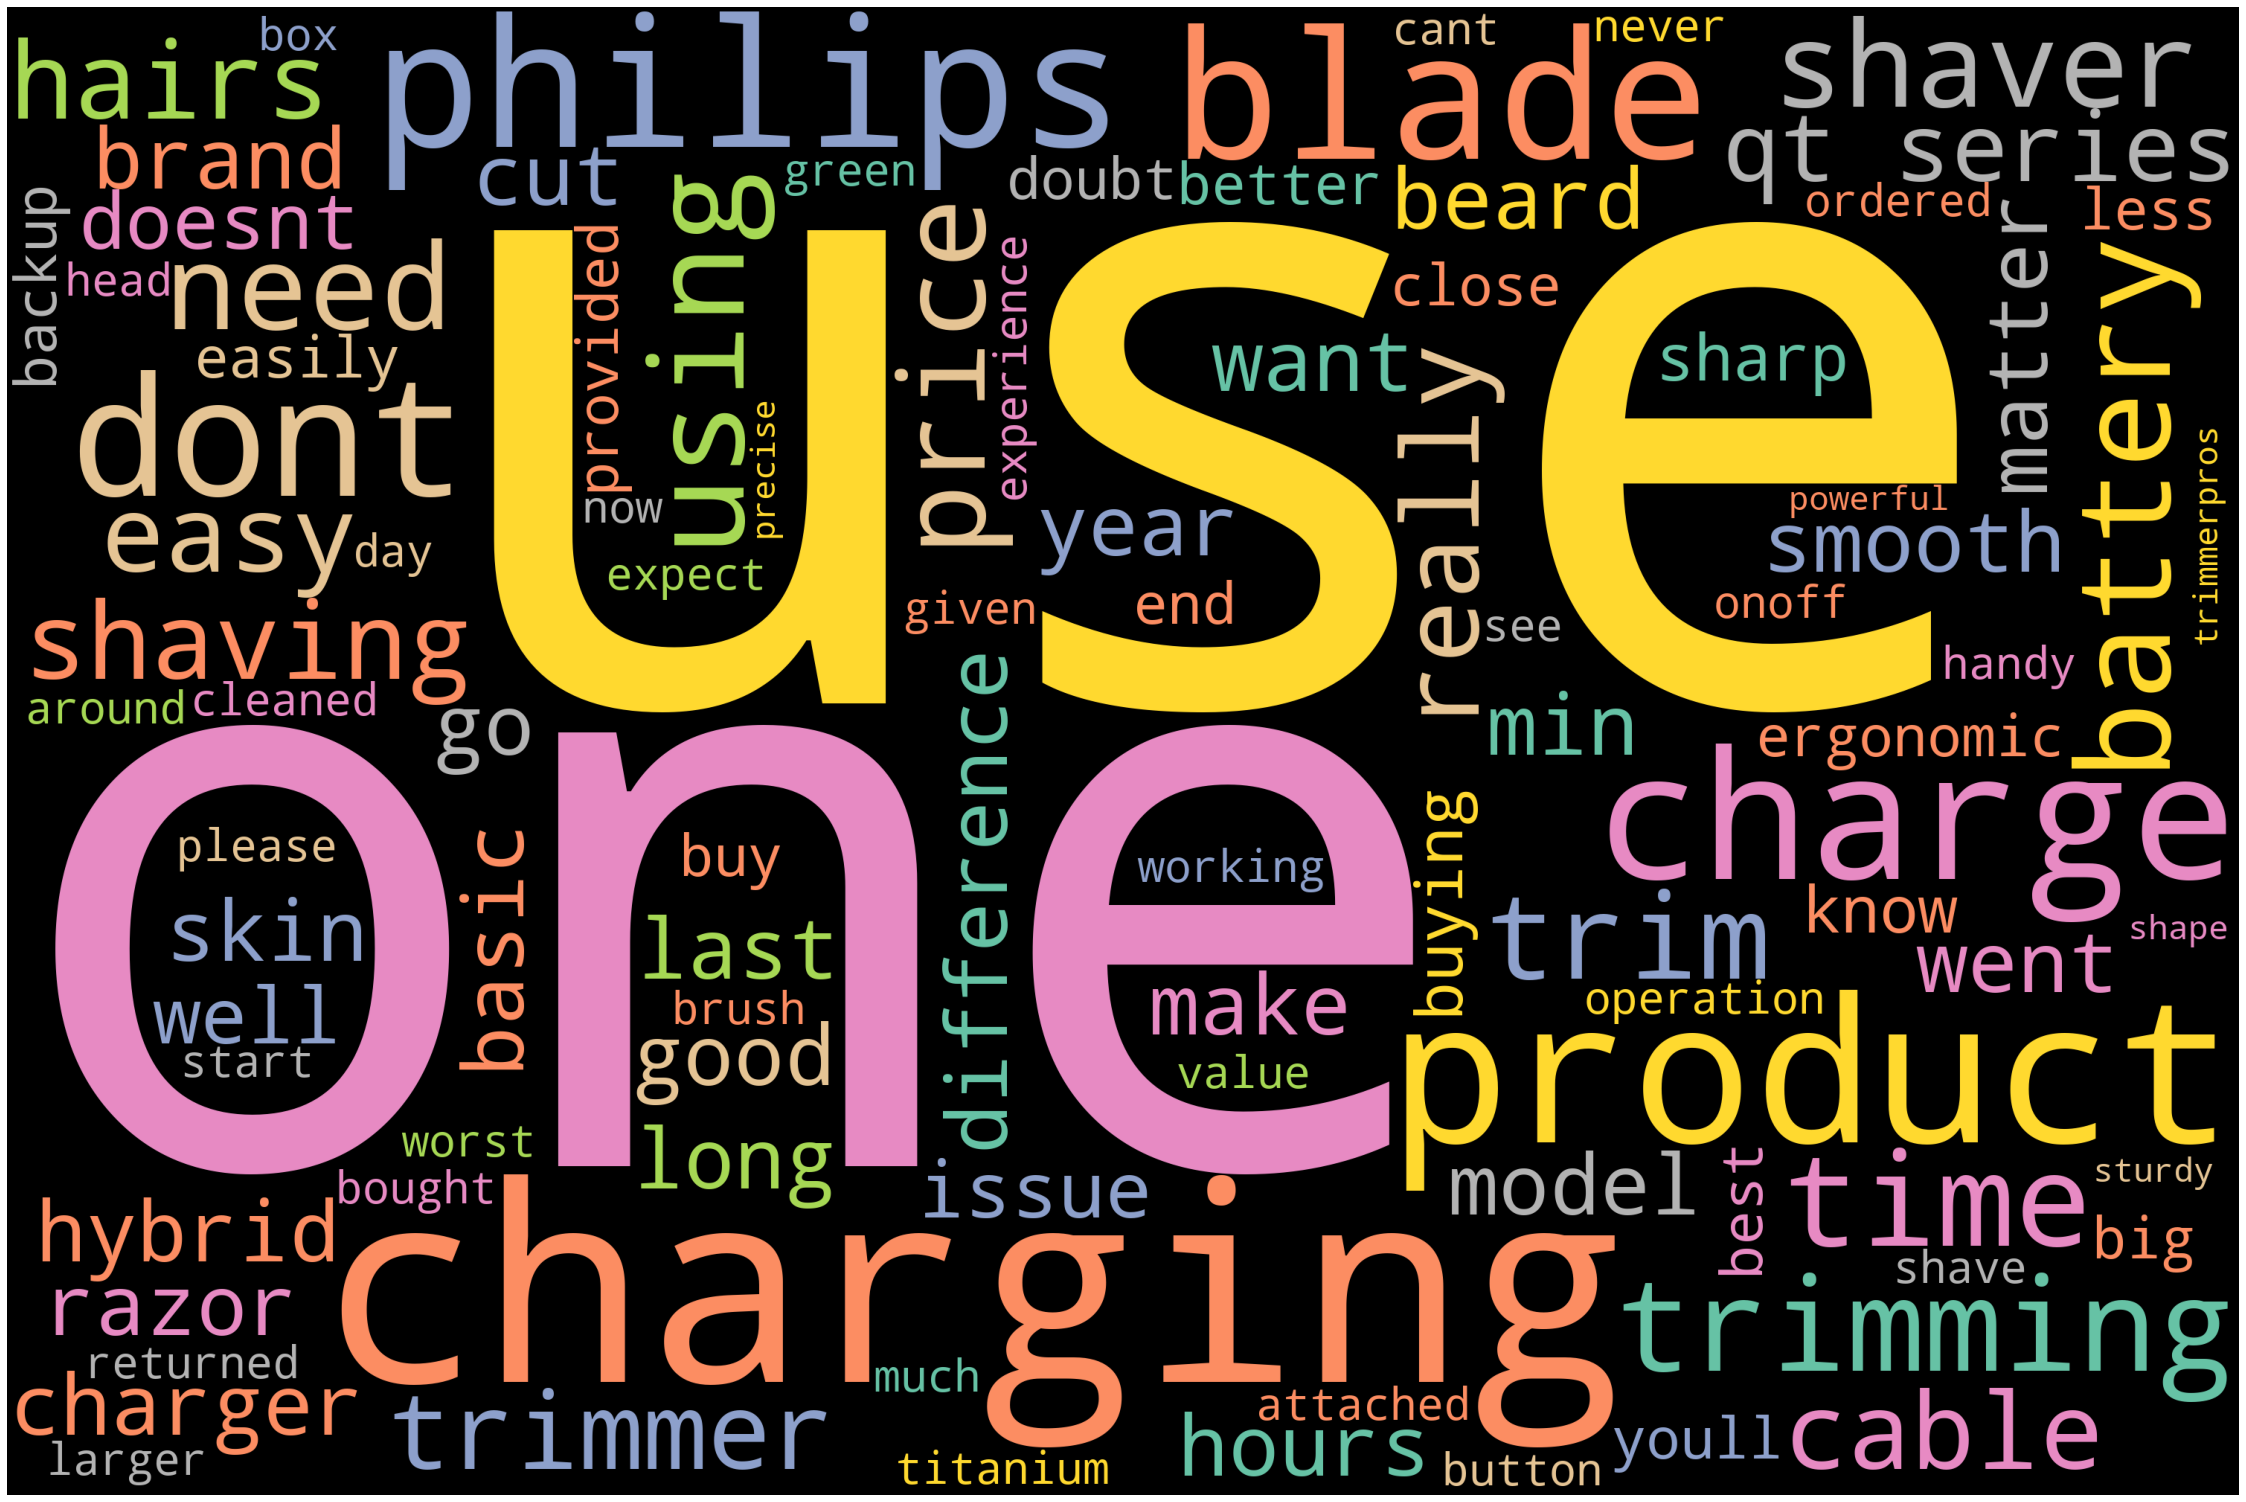

In [153]:
stopwords = STOPWORDS
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

### So this Worlcloud gives better insights compared to previous as we have done text processing

In [154]:
wordcloud.to_file("E:\ExcelR Assignment\Assignment 11 - Text Mining\wordcloud_BeardTrimmer.png")

## Sentiment Analysis

In [208]:
df1 = df.copy()
df1.head()

,Customer_Name,Review_Title,Product_Rating,Product_Review
0,Vaibhav Agarwal,All you need to know!,4.0 out of 5 stars,All you need to know before buying this trim...
1,parthasarathy,Not working after one use,1.0 out of 5 stars,"I had use this product only one time , after..."
2,Dr.Hasanur Rahman,Good,5.0 out of 5 stars,"Product is good; but is hasn't charger, only..."
3,SunGazer,So much simpler to trim with this one.,5.0 out of 5 stars,I just use this on the minimum setting every...
4,Abhijeet Tambe,Awesome,5.0 out of 5 stars,If you fed up with your regular trimmer then...


### Checking Sentiments from TextBlob default

In [209]:
df['Product_Review'].apply(lambda x: TextBlob(x).sentiment)

0     (0.16637931034482759, 0.5141379310344827)
1     (0.13333333333333333, 0.4666666666666666)
2                                   (0.35, 0.8)
3                                   (-0.2, 0.6)
4     (0.37777777777777777, 0.5233618233618232)
5    (-0.36388888888888893, 0.6444444444444445)
6    (-0.21333333333333332, 0.5373333333333333)
7                 (0.06875, 0.7597222222222222)
8      (0.3611111111111111, 0.6111111111111112)
9     (0.05310374149659864, 0.4255102040816326)
Name: Product_Review, dtype: object

In [210]:
df1['sentiment'] = df1['Product_Review'].apply(lambda x: TextBlob(x).sentiment[0] )
df1[['Product_Review','sentiment']].head()

,Product_Review,sentiment
0,All you need to know before buying this trim...,0.166379
1,"I had use this product only one time , after...",0.133333
2,"Product is good; but is hasn't charger, only...",0.350000
3,I just use this on the minimum setting every...,-0.200000
4,If you fed up with your regular trimmer then...,0.377778


In [211]:
# positive words # Choose the path for +ve words stored in system
with open("E:\ExcelR Assignment\Assignment 11 - Text Mining\positive-words.txt","r") as pos:
  poswords = pos.read().split("\n")  
poswords = poswords[36:]

In [212]:
# negative words  Choose path for -ve words stored in system
with open(r"E:\ExcelR Assignment\Assignment 11 - Text Mining\negative-words.txt","r") as neg:
  negwords = neg.read().split("\n")
negwords = negwords[38:]

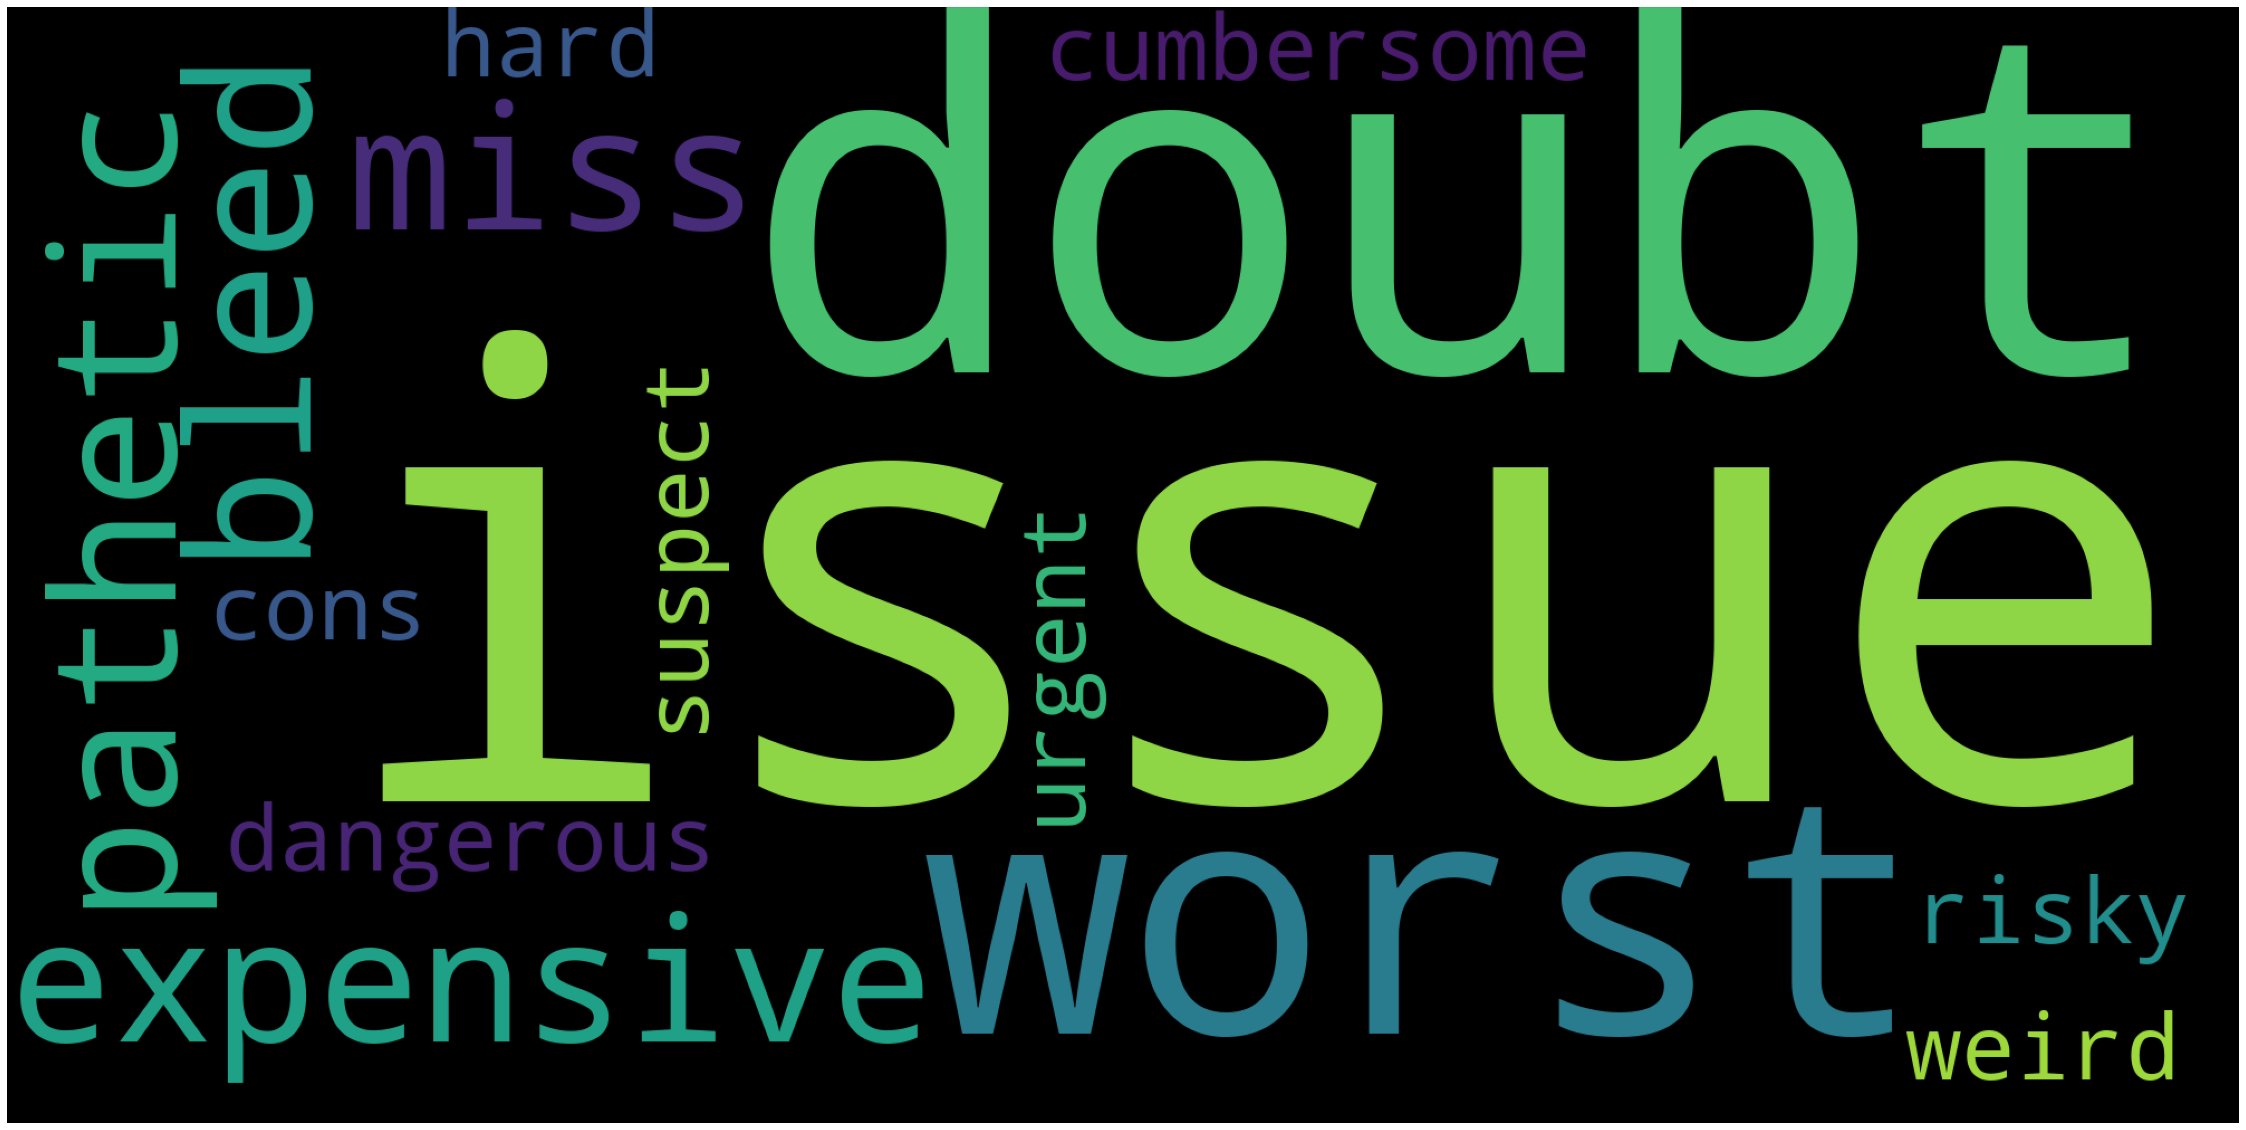

In [213]:
# negative word cloud
# Choosing the only words which are present in negwords
ip_neg_in_neg = " ".join ([w for w in no_stop_tokens if w in negwords])
wordcloud_neg_in_neg = WordCloud(
                      background_color='black',
                      width=2000,
                      height=1000
                     ).generate(ip_neg_in_neg)
plot_cloud(wordcloud_neg_in_neg)

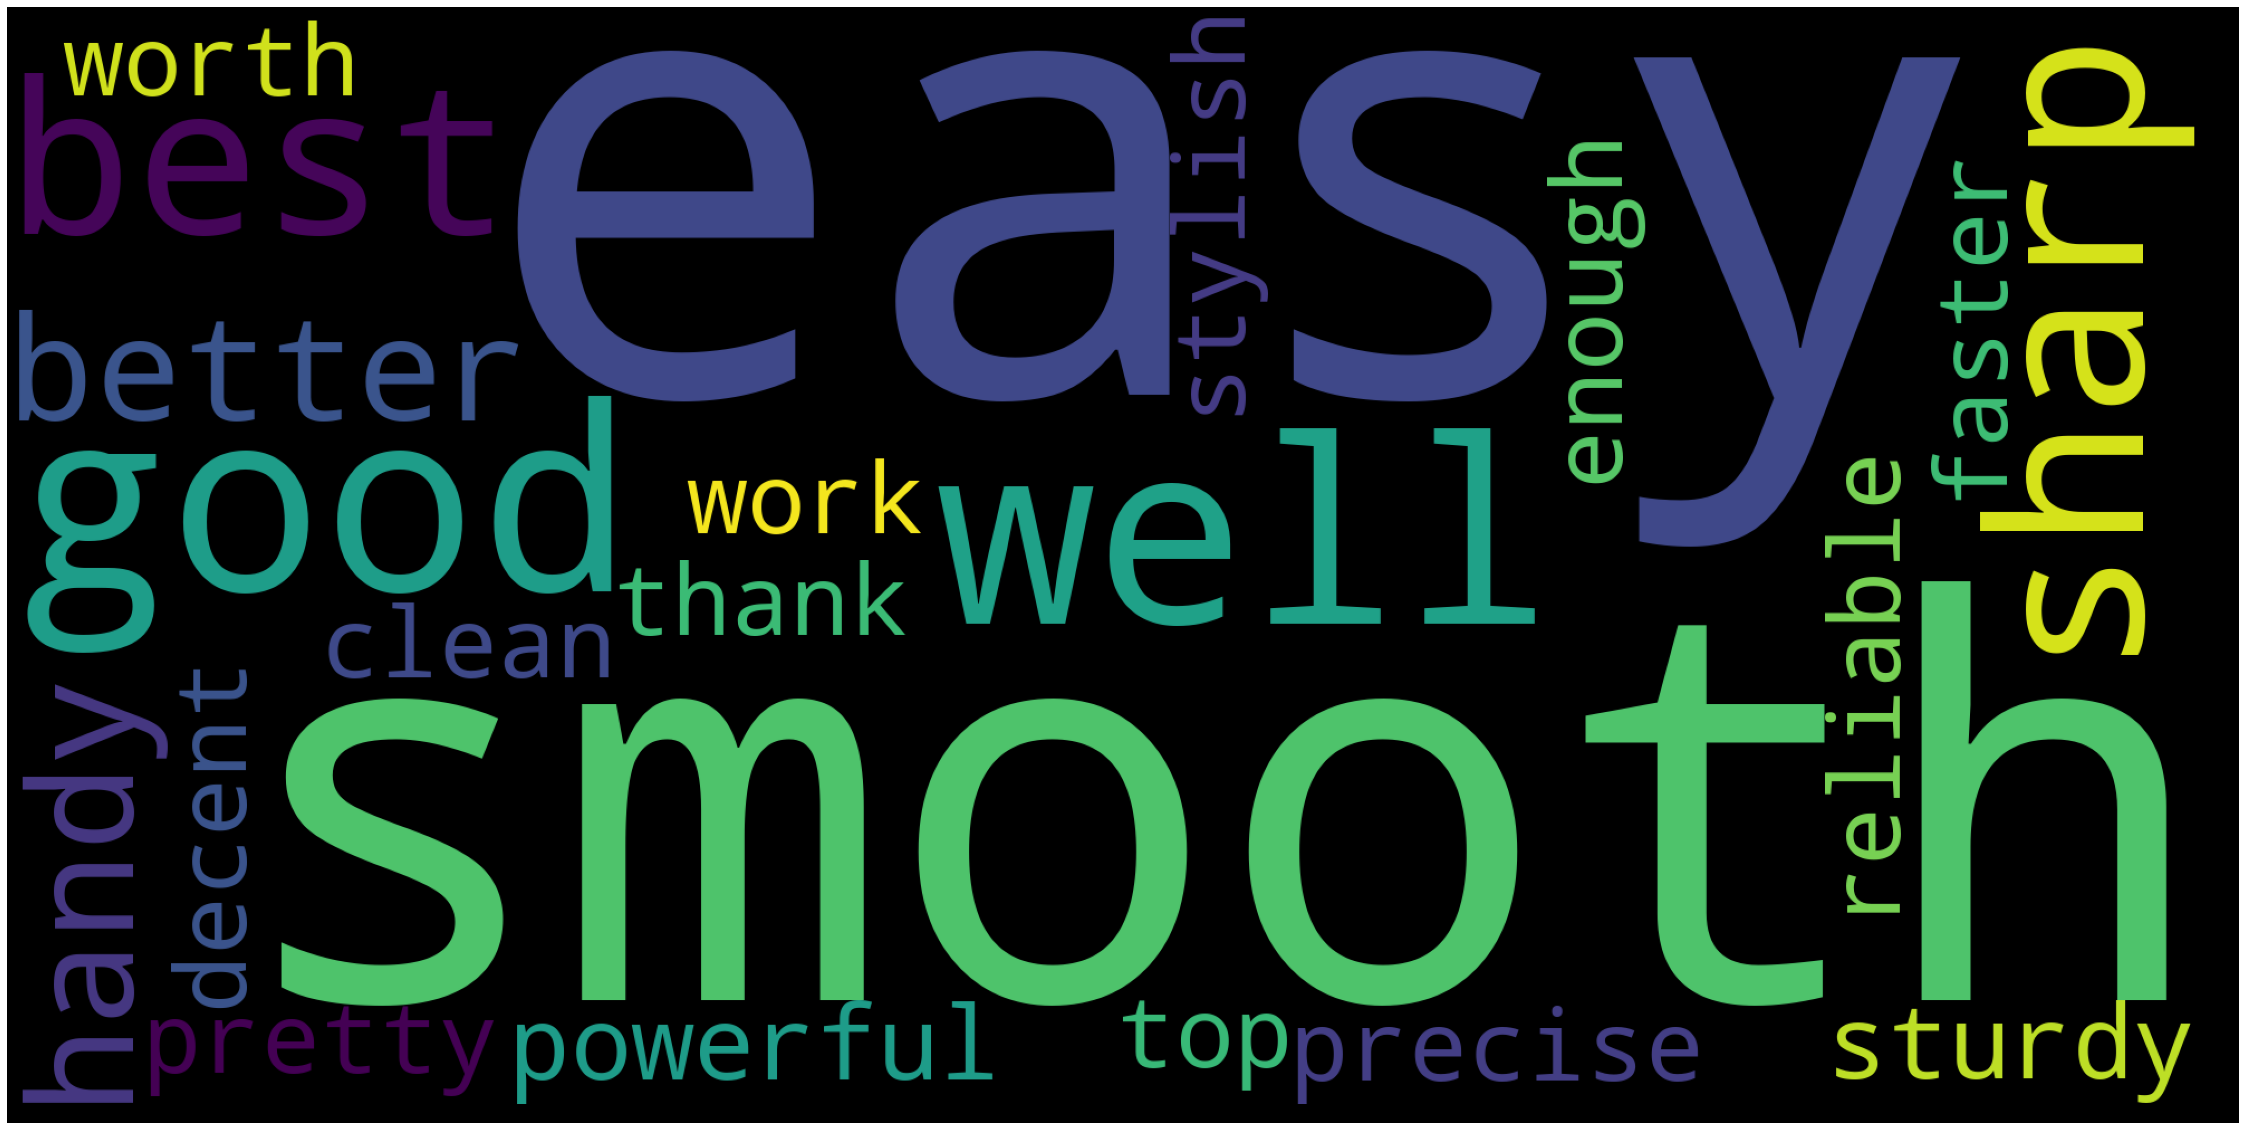

In [214]:
# Positive word cloud
# Choosing the only words which are present in positive words
ip_pos_in_pos = " ".join ([w for w in no_stop_tokens if w in poswords])
wordcloud_pos_in_pos = WordCloud(
                      background_color='black',
                      width=2000,
                      height=1000
                     ).generate(ip_pos_in_pos)
plot_cloud(wordcloud_pos_in_pos)

### Sentiment Analyzer

In [215]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

In [216]:
sia = SIA()
results = []

for line in df1['Product_Review']:
    pol_score = sia.polarity_scores(line)
    pol_score['Reviews1'] = line
    results.append(pol_score)
results

[{'neg': 0.044,
  'neu': 0.9,
  'pos': 0.056,
  'compound': 0.7915,
  'Reviews1': '  All you need to know before buying this trimmerPros:* Powerful* Sturdy* Sharp and Precise* Ergonomic Shape and Easy to use.* 5 trims in one charge* Usb type charging* Easy to cleanCons:* Charger not provided (only cable is provided)* Charging takes 8 hours.* Only 3 sizes (1mm, 5mm, 7mm)In the process of buying this trimmer, I went through a lot of web surfing. Here is what I found.Brand: No doubt Philips is the best brand for trimmer and shaver as of now.Why Trimmer, and not Shaver or Hybrid of both?This was one of the main doubts. Weather one should go for a trimmer, a shaver or a hybrid of both. Electric shavers does feel pretty smooth and leave less cuts on skin, but don’t give shaves as close a a razor. If one wants to trim, you’ll anyways need a trimmer. More over, you’ll have to wait for 8 hours of charging to get shaved which can easily be done by a razor too which I think is a big trade off. Hy

In [220]:
df = pd.DataFrame.from_records(results)
df.head
df['Sentiments'] = 0
df.loc[df['compound'] > 0.5, 'Sentiments'] = 1
df.loc[df['compound'] < -0.5, 'Sentiments'] = -1
df.head(10)

,neg,neu,pos,compound,Reviews1,Sentiments
0,0.044,0.900,0.056,0.7915,All you need to know before buying this trim...,1
1,0.000,0.915,0.085,0.3612,"I had use this product only one time , after...",0
2,0.000,0.907,0.093,0.2382,"Product is good; but is hasn't charger, only...",0
3,0.000,0.971,0.029,0.1139,I just use this on the minimum setting every...,0
4,0.000,0.674,0.326,0.9260,If you fed up with your regular trimmer then...,1
5,0.199,0.801,0.000,-0.9036,Worst product from such a big brand. Batter...,-1
6,0.102,0.860,0.038,-0.4843,This is the worst item... Never buy it... I ...,0
7,0.125,0.836,0.039,-0.6136,I have been shaving and trimming for 8 years...,-1
8,0.144,0.741,0.116,-0.2382,Good and easy to use. but beware when using ...,0
9,0.046,0.861,0.092,0.9487,One of the few products to have got 1 star f...,1


<AxesSubplot:>

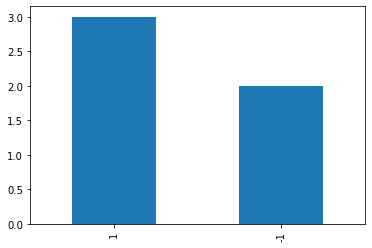

In [221]:
df2=df.copy()
df2['sent']= df.Sentiments
df2= df2[df2['sent'] != 0] ##3408 reviews
df2['sent'].value_counts().plot.bar()

- So people are talking more Positive about the Beard Trimmer
- Product also seems to have comparable Negative Reviews, which means product needs some more feature to outstand in market